# Analisis Ride-Sharing Company

Kita akan mengidentifikasi pola-pola untuk memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan. Caranya, kita akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

# Konten <a id='back'></a>

1. Pendahuluan
    
    
2. Pra-pemrosesan Data
    * Memuat Data
    * Mengeksplorasi Data Awal
    * Memeriksa Kualitas Data
    * Memeriksa Nilai-nilai yang Hilang
    * Memeriksa Data Duplikat
    * Kesimpulan Awal
   

3. Analisis Data Eksploratif (EDA)
    * Wilayah mana saja yang teridentifikasi menjadi 10 wilayah teratas yang dijadikan sebagai titik pengantaran?
    * Sepuluh wilayah teratas berdasarkan jumlah pengantaran
    * Kesimpulan Menengah


4. Uji Hipotesis
    * Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan!
    
    
5. Kesimpulan Menyeluruh

## Pendahuluan <a id='intro'></a>

Kita akan mengidentifikasi pola-pola untuk memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan. Caranya, kita akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

Kita bertujuan untuk:
1. Menganalisa pola-pola untuk memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan
2. Menguji hipotesis: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan!

## Pra-pemrosesan Data <a id='intro'></a>


### Memuat Data

In [1]:
# Memuat library pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Muat file data menjadi DataFrame

df_1 = pd.read_csv('project_sql_result_01.csv')
df_2 = pd.read_csv('project_sql_result_04.csv')
df_3 = pd.read_csv('project_sql_result_07.csv')

### Mengeksplorasi Data Awal

Kita memiliki dua dataframe berikut:

1. *`df_1`* - memuat data berikut ini:

    * *`company_name`* : nama perusahaan taksi
    * *`trips_amount`* : jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.


2. *`df_2`* - memuat data berikut ini:

    * *`dropoff_location_name`* : nama wilayah di Chicago tempat perjalanan berakhir
    * *`average_trips`* : jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.
    
    
3. *`df_3`* - memuat data perjalanan dari Loop ke Bandara Internasional O'Hare dengan isi kolom-kolom berikut ini:
    
    * *`start_ts`* : tanggal dan waktu penjemputan
    * *`weather_conditions`* : kondisi cuaca saat perjalanan dimulai
    * *`duration_seconds`* : durasi perjalanan dalam satuan detik

In [3]:
# Menampilkan informasi/rangkuman umum tentang ketiga DataFrame

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata info for df_{number}')
    print(dataset.info())
    number += 1


data info for df_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

data info for df_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

data info for df_3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   obj

In [4]:
# Menampilkan informasi/rangkuman umum tentang ketiga DataFrame

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata head for df_{number}')
    print(dataset.head())
    number += 1    


data head for df_1
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

data head for df_2
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

data head for df_3
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [5]:
# Menampilkan informasi/rangkuman umum tentang ketiga DataFrame

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata describe for df_{number}')
    print(dataset.describe())
    number += 1    


data describe for df_1
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

data describe for df_2
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

data describe for df_3
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


Dari eksplorasi awal, kita mendapati bahwa dari ketiga DataFrame tampak cukup bagus, dimana penamaan kolom sudah tepat dengan gaya penulisan snake_case dan tidak ada nilai-nilai yang hilang, namu perlu perbaikan pada tipe data yang dirasa kurang sesuai, yaitu:
1. Pada tabel df_2 kolom average_trips merupakan rata-rata perjalanan setiap penumpang, maka tipe floating perlu kita ubah menjadi integer dengan menghapus akhiran koma, agar lebih tepat dengan makna kolom tersebut.

2. Pada tabel df_3 kolom start_ts berisi tanggal dan waktu, seharusnya bertipe datetime bukan object.


### Memeriksa Kualitas Data

In [6]:
# Memeriksa kualitas data kolom company_name di df_1

sorted(df_1['company_name'].unique())

['0118 - 42111 Godfrey S.Awir',
 '1085 - 72312 N and W Cab Co',
 '1469 - 64126 Omar Jada',
 '2092 - 61288 Sbeih company',
 '2192 - 73487 Zeymane Corp',
 '2241 - 44667 - Felman Corp, Manuel Alonso',
 '24 Seven Taxi',
 '2733 - 74600 Benny Jona',
 '2809 - 95474 C & D Cab Co Inc.',
 '2823 - 73307 Lee Express Inc',
 '3011 - 66308 JBL Cab Inc.',
 '303 Taxi',
 '3556 - 36214 RC Andrews Cab',
 '3591 - 63480 Chuks Cab',
 '3620 - 52292 David K. Cab Corp.',
 '3623 - 72222 Arrington Enterprises',
 '3721 - Santamaria Express, Alvaro Santamaria',
 '4053 - 40193 Adwar H. Nikola',
 '4615 - 83503 Tyrone Henderson',
 '4623 - 27290 Jay Kim',
 '5 Star Taxi',
 '5006 - 39261 Salifu Bawa',
 '5062 - 34841 Sam Mestas',
 '5074 - 54002 Ahzmi Inc',
 '5874 - 73628 Sergey Cab Corp.',
 '5997 - 65283 AW Services Inc.',
 '6057 - 24657 Richard Addo',
 '6574 - Babylon Express Inc.',
 '6742 - 83735 Tasha ride inc',
 '6743 - 78771 Luhak Corp',
 'American United',
 'American United Taxi Affiliation',
 'Blue Diamond',
 'Blue

In [7]:
# Memeriksa kualitas data kolom trips_amount di df_1

df_1['trips_amount'].unique()

array([19558, 11422, 10367,  9888,  9299,  9181,  8448,  7701,  7455,
        5953,  5015,  4383,  3355,  3175,  2235,  2216,  2070,  1955,
        1775,  1607,  1486,  1404,  1296,  1259,  1014,   978,   428,
         402,   310,   250,   230,   210,   147,   146,   127,    39,
          37,    36,    33,    31,    29,    27,    25,    21,    20,
          16,    15,    14,    13,    12,    11,     8,     7,     5,
           3,     2])

In [8]:
# Memeriksa kualitas data kolom dropoff_location_name di df_2

sorted(df_2['dropoff_location_name'].unique())

['Albany Park',
 'Andersonville',
 'Archer Heights',
 'Armour Square',
 'Ashburn',
 'Auburn Gresham',
 'Austin',
 'Avalon Park',
 'Avondale',
 'Belmont Cragin',
 'Beverly',
 'Boystown',
 'Bridgeport',
 'Brighton Park',
 'Bucktown',
 'Burnside',
 'Calumet Heights',
 'Chatham',
 'Chicago Lawn',
 'Chinatown',
 'Clearing',
 'Douglas',
 'Dunning',
 'East Side',
 'East Village',
 'Edgewater',
 'Edison Park',
 'Englewood',
 'Fuller Park',
 'Gage Park',
 'Garfield Park',
 'Garfield Ridge',
 'Gold Coast',
 'Grand Boulevard',
 'Grand Crossing',
 'Grant Park',
 'Hegewisch',
 'Hermosa',
 'Humboldt Park',
 'Hyde Park',
 'Irving Park',
 'Jackson Park',
 'Jefferson Park',
 'Kenwood',
 'Lake View',
 'Lincoln Park',
 'Lincoln Square',
 'Little Italy, UIC',
 'Little Village',
 'Logan Square',
 'Loop',
 'Lower West Side',
 'Mckinley Park',
 'Montclare',
 'Morgan Park',
 'Mount Greenwood',
 'Museum Campus',
 'Near South Side',
 'New City',
 'North Center',
 'North Lawndale',
 'North Park',
 'Norwood Park'

In [9]:
# Memeriksa kualitas data kolom average_trips di df_2

df_2['average_trips'].value_counts()

10727.466667    1
23.200000       1
14.500000       1
15.166667       1
16.033333       1
               ..
180.900000      1
182.600000      1
208.233333      1
255.133333      1
1.800000        1
Name: average_trips, Length: 94, dtype: int64

In [10]:
# Memeriksa kualitas data kolom start_ts di df_3

sorted(df_3['start_ts'].unique())

['2017-11-04 00:00:00',
 '2017-11-04 01:00:00',
 '2017-11-04 02:00:00',
 '2017-11-04 04:00:00',
 '2017-11-04 05:00:00',
 '2017-11-04 06:00:00',
 '2017-11-04 07:00:00',
 '2017-11-04 08:00:00',
 '2017-11-04 09:00:00',
 '2017-11-04 10:00:00',
 '2017-11-04 11:00:00',
 '2017-11-04 12:00:00',
 '2017-11-04 13:00:00',
 '2017-11-04 14:00:00',
 '2017-11-04 15:00:00',
 '2017-11-04 16:00:00',
 '2017-11-04 17:00:00',
 '2017-11-04 18:00:00',
 '2017-11-04 19:00:00',
 '2017-11-04 20:00:00',
 '2017-11-04 21:00:00',
 '2017-11-04 22:00:00',
 '2017-11-11 03:00:00',
 '2017-11-11 04:00:00',
 '2017-11-11 05:00:00',
 '2017-11-11 06:00:00',
 '2017-11-11 07:00:00',
 '2017-11-11 08:00:00',
 '2017-11-11 09:00:00',
 '2017-11-11 10:00:00',
 '2017-11-11 11:00:00',
 '2017-11-11 12:00:00',
 '2017-11-11 13:00:00',
 '2017-11-11 14:00:00',
 '2017-11-11 15:00:00',
 '2017-11-11 16:00:00',
 '2017-11-11 17:00:00',
 '2017-11-11 18:00:00',
 '2017-11-11 19:00:00',
 '2017-11-11 20:00:00',
 '2017-11-11 21:00:00',
 '2017-11-11 23:

In [11]:
# Memeriksa kualitas data kolom weather_conditions di df_3

df_3['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [12]:
# Memeriksa kualitas data kolom duration_seconds di df_2

df_3['duration_seconds'].value_counts()

1380.0    41
1260.0    35
1440.0    29
1320.0    23
1200.0    23
          ..
4140.0     1
1547.0     1
2271.0     1
2141.0     1
2834.0     1
Name: duration_seconds, Length: 495, dtype: int64

Hasil dari pemeriksaan kualitas data, ketiga DataFrame juga tampak bagus. Tidak ada nilai NaN pada data kita. Namun, pada tabel df_2, kolom average_trips merupakan rata-rata perjalanan setiap penumpang, maka tipe floating perlu kita ubah menjadi integer dengan menghapus akhiran koma, agar lebih tepat dengan makna kolom tersebut.

### Memeriksa Nilai-nilai yang Hilang

In [13]:
# Memastikan apakah benar tidak ada nilai-nilai yang hilang pada DataFrame

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata sample for df_{number}')
    print(dataset.isna().sum() / len(dataset) * 100)
    number += 1


data sample for df_1
company_name    0.0
trips_amount    0.0
dtype: float64

data sample for df_2
dropoff_location_name    0.0
average_trips            0.0
dtype: float64

data sample for df_3
start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64


### Memperbaiki Tipe Data

1. Pada tabel df_2 kolom average_trips merupakan rata-rata perjalanan setiap penumpang, maka tipe floating perlu kita ubah menjadi integer dengan menghapus akhiran koma, agar lebih tepat dengan makna kolom tersebut.
2. Pada tabel df_3 kolom start_ts berisi tanggal dan waktu, seharusnya bertipe datetime bukan object.

In [14]:
# Melihat kembali table df_2

df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [15]:
# Melihat kembali table df_3

df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [16]:
# Mengubah tipe data kolom average_trips pada tabel df_2

df_2['average_trips'] = df_2['average_trips'].astype(int)

In [17]:
# Mengubah tipe data kolom start_ts pada tabel df_3

df_3['start_ts'] = df_3['start_ts'].apply(pd.to_datetime)

In [18]:
# Melihat kembali data kita setelah perbaikan tipe data average_trips

df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [19]:
# Melihat kembali data kita setelah perbaikan tipe data start_ts

df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [20]:
# Melihat kembali tipe data dari deskripsi umum setelah perbaikan tipe data

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata info for df_{number}')
    print(dataset.info())
    number += 1


data info for df_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

data info for df_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None

data info for df_3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-nu

### Memeriksa Data Duplikat

In [21]:
# Memeriksa apakah ada data duplikat

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata sample for df_{number}')
    print(dataset.duplicated(keep = False).sum())
    number += 1


data sample for df_1
0

data sample for df_2
0

data sample for df_3
312


Terdapat data duplikat sebanyakan 312 rows di df_3. Kita akan menghapus data duplikat tersebut.

In [22]:
# Menghapus data duplikat di df_3

df_3 = df_3.drop_duplicates().reset_index(drop=True)

In [23]:
# Memeriksa kembali apakah sudah tidak ada lagi data duplikat

number = 1
for dataset in df_1, df_2, df_3:
    print(f'\ndata sample for df_{number}')
    print(dataset.duplicated(keep = False).sum())
    number += 1


data sample for df_1
0

data sample for df_2
0

data sample for df_3
0


### Kesimpulan Awal

* Jumlah data yang dimiliki hanya sedikit mengingat periode datanya yang pendek di bulan November 2017, dari tabel df_1 sebanyak 64 baris dan tabel df_2 sebanyak 94 baris, dengan masing-masing tabel berjumlah 2 kolom.

* Kualitas datanya cukup bagus, dimana tipe data yang sudah sesuai, penamaan kolom yang sudah tepat, tidak ada nilai-nilai yang hilang, namun ada ada data duplikat di df_3 yang telah diperbaiki.

* Kemudian, pada tabel df_2, kolom average_trips merupakan rata-rata perjalanan setiap penumpang, maka tipe floating tersebut telah kita ubah menjadi integer dengan menghapus akhiran koma, agar lebih tepat dengan makna kolom tersebut.

## Analisis Data Eksploratif (EDA)

### Wilayah mana saja yang teridentifikasi menjadi 10 wilayah teratas yang dijadikan sebagai titik pengantaran?


In [24]:
df_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [25]:
# Melihat kembali tabel df_2

df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [26]:
# Mengidentifikasi 10 wilayah teratas berdasarkan lokasi titik pengantaran

pivot = df_2.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='sum').sort_values(
    by='average_trips', ascending=False).reset_index()
pivot_filtered = pivot.head(10)
pivot_filtered

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


* Finding:

    * Dari data diatas, 10 wilayah teratas berdasarkan jumlah pengantaran diantaranya adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.

* Insight:

    * Wilayah Loop 10x lipat lebih banyak diminati penumpang dari pada Sheffield & DePau (10727 vs. 1259)

* Recommendations:

    * Fokuslah ke wilayah Loop, karena merupakan Top 1 wilayah titik antar yang paling diminati penumpang. Namun, bersiap-siaplah dengan kompetitor yang tinggi pula.
       
    * Apabila ingin tantangan baru di wilayah baru, bisa dimulai dari yang Top 10 yaitu Sheffield & DePaul. Periklanan dan sosialisasi harus ditingkatkan sebab bisa saja rendahnya titik antar kesana dikarenakan penduduk wilayah tersebut belum mengetahui mengenai metode perjalanan dengan ride-sharing.

### Visualisiasi data dengan barplot
#### Perusahaan taksi dan jumlah perjalanannya

In [27]:
# Melihat kembali tabel df_1

df_1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


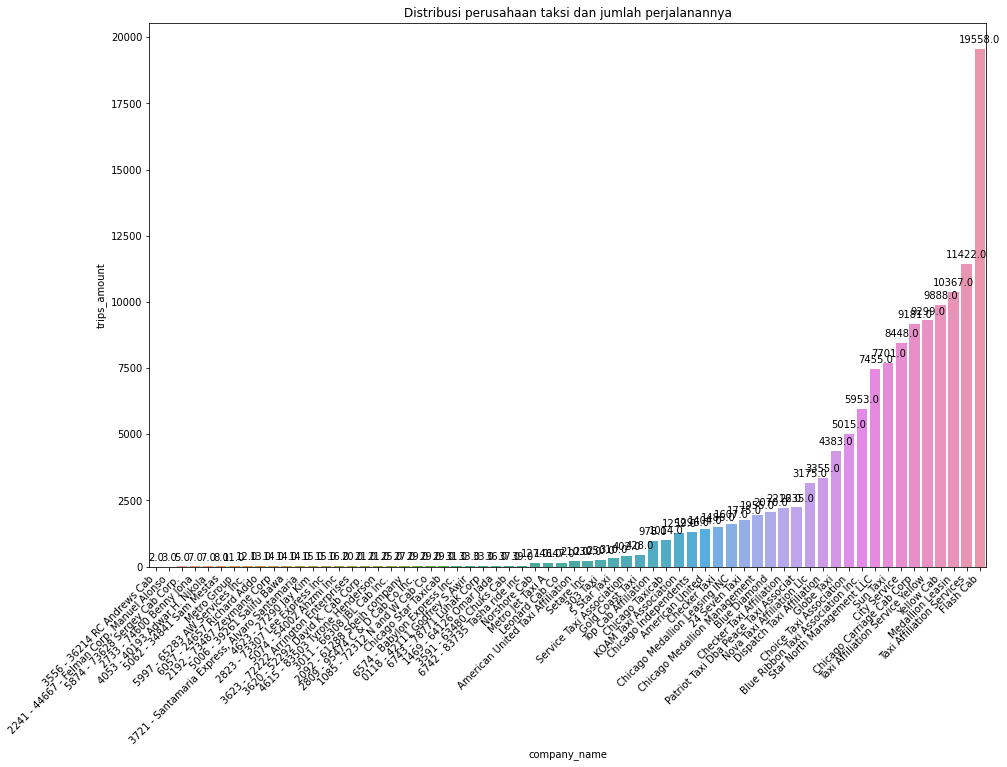

In [28]:
# Visualisasi dengan barplot

plt.figure(figsize=(15,10))
bplot = sns.barplot(data=df_1.sort_values(by='trips_amount'), x='company_name', y='trips_amount');
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi perusahaan taksi dan jumlah perjalanannya');

* Finding:
    * Perusahaan taksi yang paling terkenal dengan jumlah perjalanan diatas 10ribu kali selama bulan November 2017, diantaranya adalah Flash Cab, Taxi Affiliation Services, dan Medallion Leasing.
    
* Insight:
    * Pastinya ada banyak faktor mengapa banyak penumpang di Chicago memilih perjalanannya menggunakan ketiga perusahaan taksi tersebut. Bisa dari jumlah armada taksi yang memadai, kemudahan akses dalam memesan taksi, sampai dengan kondisi taksi yang nyaman serta tarif yang dikenakan. 

* Recomendation:
    * Kita perlu banyak menggali apa saja kelebihan para kompetitor yang menarik hati banyak penumpang, untuk dapat bersaing dengan mereka di Chicago. Ketiga perusahaan taksi terkenal Flash Cab, Taxi Affiliation Services, dan Medallion Leasing, dapat dijadikan tolak ukur.

#### Sepuluh wilayah teratas berdasarkan jumlah pengantaran

In [29]:
# Melihat kembali table 10 wilayah teratas berdasarkan lokasi titik pengantaran

pivot_filtered

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


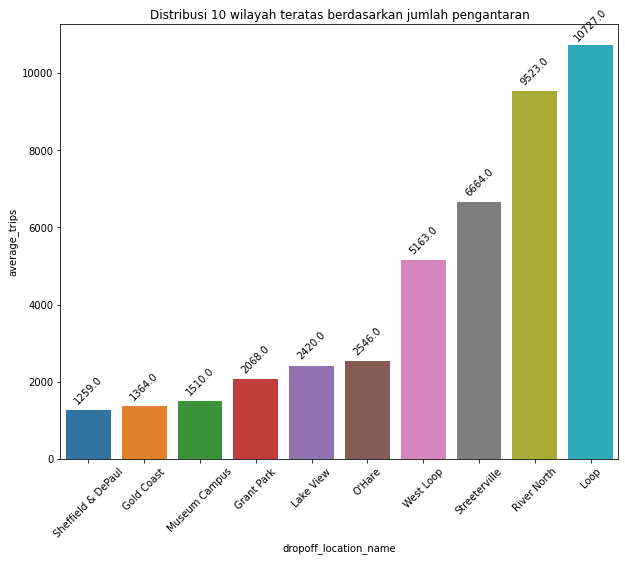

In [30]:
# Visualisasi dengan barplot 

plt.figure(figsize=(10,8))
splot = sns.barplot(data=pivot_filtered.sort_values(by='average_trips'), x='dropoff_location_name', y='average_trips')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Distribusi 10 wilayah teratas berdasarkan jumlah pengantaran')
plt.show();

* Finding:

    * Dari data diatas, 10 wilayah teratas berdasarkan jumlah pengantaran diantaranya adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.

* Insight:

    * Wilayah Loop 10x lipat lebih banyak diminati penumpang dari pada Sheffield & DePau (10727 vs. 1259)

* Recommendations:

    * Fokuslah ke wilayah Loop, karena merupakan Top 1 wilayah titik antar yang paling diminati penumpang. Namun, bersiap-siaplah dengan kompetitor yang tinggi pula.

    * Apabila ingin tantangan baru di wilayah baru, bisa dimulai dari yang Top 10 yaitu Sheffield & DePaul. Periklanan dan sosialisasi harus ditingkatkan karena mungkin saja rendahnya titik antar kesana dikarenakan penduduk wilayah tersebut belum mengetahui mengenai metode perjalanan dengan ride-sharing.

### Kesimpulan Menengah

1. Perusahaan taksi yang paling terkenal dengan jumlah perjalanan diatas 10ribu kali selama bulan November 2017, diantaranya adalah Flash Cab, Taxi Affiliation Services, dan Medallion Leasing.

2. Sementara, untuk 10 wilayah teratas berdasarkan jumlah pengantaran diantaranya adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.

3. Wilayah Loop 10x lipat lebih banyak diminati penumpang dari pada Sheffield & DePau (10727 vs. 1259)

## Uji Hipotesis

Kita akan menguji hipotesis, yaitu:
* Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan!

Dimana:
* Nilai "alpha" yang akan digunakan = 0.05
Kita akan menggunakan pendekatan hipotesis dua sample independent (Independent T-Test) karena menggunakan dua sample yang berbeda yaitu data perjalanan dari Loop ke Bandara Internasional O'Hare dengan kondisi cuaca bagus dan kondisi cuaca buruk.

* Ho = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari-hari Sabtu yang hujan! (=)

* H1 = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak sama pada hari-hari Sabtu yang hujan! (/=)

In [31]:
# Melihat kembali df_3

df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [32]:
# Mengambil bulan dan hari perjalanan dimulai dari kolom start_ts untuk keperluan visualisasi

df_3['months'] = df_3['start_ts'].dt.month
df_3['days'] = df_3['start_ts'].dt.day
df_3

,start_ts,weather_conditions,duration_seconds,months,days
0,2017-11-25 16:00:00,Good,2410.0,11,25
1,2017-11-25 14:00:00,Good,1920.0,11,25
2,2017-11-25 12:00:00,Good,1543.0,11,25
3,2017-11-04 10:00:00,Good,2512.0,11,4
4,2017-11-11 07:00:00,Good,1440.0,11,11
...,...,...,...,...,...
866,2017-11-04 14:00:00,Good,2700.0,11,4
867,2017-11-18 16:00:00,Bad,2186.0,11,18
868,2017-11-25 11:00:00,Good,0.0,11,25
869,2017-11-11 10:00:00,Good,1318.0,11,11


In [33]:
# Menambahkan kolom month_day untuk waktu perjalanan dimulai untuk keperluan visualisasi

df_3['month_day'] = df_3['months'].astype('str') + '_' + df_3['days'].astype('str')
df_3

,start_ts,weather_conditions,duration_seconds,months,days,month_day
0,2017-11-25 16:00:00,Good,2410.0,11,25,11_25
1,2017-11-25 14:00:00,Good,1920.0,11,25,11_25
2,2017-11-25 12:00:00,Good,1543.0,11,25,11_25
3,2017-11-04 10:00:00,Good,2512.0,11,4,11_4
4,2017-11-11 07:00:00,Good,1440.0,11,11,11_11
...,...,...,...,...,...,...
866,2017-11-04 14:00:00,Good,2700.0,11,4,11_4
867,2017-11-18 16:00:00,Bad,2186.0,11,18,11_18
868,2017-11-25 11:00:00,Good,0.0,11,25,11_25
869,2017-11-11 10:00:00,Good,1318.0,11,11,11_11


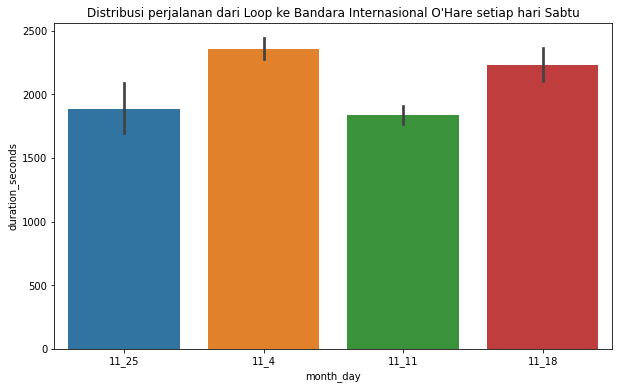

In [34]:
# Visualisasi dengan barplot

plt.figure(figsize=(10,6))
sns.barplot(data=df_3, x='month_day', y='duration_seconds')
plt.title("Distribusi perjalanan dari Loop ke Bandara Internasional O'Hare setiap hari Sabtu")
plt.show();

Berdasarkan barplot diatas, terlihat bahwa trend perjalanan dari Loop ke O'Hare setiap hari Sabtu pada week pertama dan ketiga hampir sama, sementara week kedua hampir sama dengan week keempat.

In [35]:
# Melihat distribusi kolom weather_conditions

df_3['weather_conditions'].value_counts()

Good    723
Bad     148
Name: weather_conditions, dtype: int64

In [36]:
# Membagi df_3 berdasarkan weather_conditions

good_weather = df_3[df_3['weather_conditions'] == 'Good'].reset_index()
bad_weather = df_3[df_3['weather_conditions'] == 'Bad'].reset_index()

In [37]:
# Melihat tabel good_weather 

good_weather.head()

,index,start_ts,weather_conditions,duration_seconds,months,days,month_day
0,0,2017-11-25 16:00:00,Good,2410.0,11,25,11_25
1,1,2017-11-25 14:00:00,Good,1920.0,11,25,11_25
2,2,2017-11-25 12:00:00,Good,1543.0,11,25,11_25
3,3,2017-11-04 10:00:00,Good,2512.0,11,4,11_4
4,4,2017-11-11 07:00:00,Good,1440.0,11,11,11_11


In [38]:
# Melihat tabel bad_weather 

bad_weather.head()

,index,start_ts,weather_conditions,duration_seconds,months,days,month_day
0,6,2017-11-04 16:00:00,Bad,2969.0,11,4,11_4
1,30,2017-11-18 12:00:00,Bad,1980.0,11,18,11_18
2,34,2017-11-04 17:00:00,Bad,2460.0,11,4,11_4
3,51,2017-11-04 16:00:00,Bad,2760.0,11,4,11_4
4,52,2017-11-18 12:00:00,Bad,2460.0,11,18,11_18


In [39]:
# Menguji hipotesis

alpha = 0.05  # signifikansi statistik kritis

results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], 
                       equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
   print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 9.126383933880083e-08
Kita menolak hipotesis nol


Hasil uji hipotesis menunjukkan bahwa kita menolak hipotesis nol, yang berarti durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak sama pada hari-hari Sabtu yang hujan.

## Kesimpulan Menyeluruh

* **Pada bagian pra-pemrosesan data:**
    1. Jumlah data yang dimiliki hanya sedikit mengingat periode datanya yang pendek di bulan November 2017, dari tabel df_1 sebanyak 64 baris dan tabel df_2 sebanyak 94 baris, dengan masing-masing tabel berjumlah 2 kolom.

    2. Kualitas datanya cukup bagus, dimana tipe data yang sudah sesuai, penamaan kolom yang sudah tepat, tidak ada nilai-nilai yang hilang, namun ada ada data duplikat di df_3 yang telah diperbaiki.

    3. Kemudian, pada tabel df_2, kolom average_trips merupakan rata-rata perjalanan setiap penumpang, maka tipe floating tersebut telah kita ubah menjadi integer dengan menghapus akhiran koma, agar lebih tepat dengan makna kolom tersebut.


* **Pada bagian Analisis Data Eksploratif (EDA):**
    1. Perusahaan taksi yang paling terkenal dengan jumlah perjalanan diatas 10ribu kali selama bulan November 2017, diantaranya adalah Flash Cab, Taxi Affiliation Services, dan Medallion Leasing.

    2. Sementara, untuk 10 wilayah teratas berdasarkan jumlah pengantaran diantaranya adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.

    3. Wilayah Loop 10x lipat lebih banyak diminati penumpang dari pada Sheffield & DePau (10727 vs. 1259)


* **Hasil Uji Hipotesis:**
    1. Hasil uji hipotesis menunjukkan bahwa kita menolak hipotesis nol, yang berarti durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak sama pada hari-hari Sabtu yang hujan.


* **Input yang dapat diberikan:**
    1. Kita perlu banyak menggali apa saja kelebihan para kompetitor yang menarik hati banyak penumpang, untuk dapat bersaing dengan mereka di Chicago. Ketiga perusahaan taksi terkenal Flash Cab, Taxi Affiliation Services, dan Medallion Leasing, dapat dijadikan tolak ukur.
    
    2. Fokuslah ke wilayah Loop, karena merupakan Top 1 wilayah titik antar yang paling diminati penumpang. Namun, bersiap-siaplah dengan kompetitor yang tinggi pula.

    3. Apabila ingin tantangan baru di wilayah baru, bisa dimulai dari yang Top 10 yaitu Sheffield & DePaul. Periklanan dan sosialisasi harus ditingkatkan karena mungkin saja rendahnya titik antar kesana dikarenakan penduduk wilayah tersebut belum mengetahui mengenai metode perjalanan dengan ride-sharing.